In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, interp2d
from scipy.misc import derivative 
from scipy.optimize import approx_fprime
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
# Creat a 2d asymetric potential based on list of minimas
# and standard deviations
minima = [[0.0,0.0], [1.0,0.0] , [1.1, 1.0], [-0.1,0.9], [-1.3,0.8], [-1.0,-0.2], [-0.6,-1.0], [0.9,-0.8], [0.2,-1.5]]
sigmas = [[0.3,0.3],[0.35,0.35],  [0.4,0.3],  [0.4,0.23], [0.25,0.35],  [0.25,0.32],   [0.4,0.28], [0.4,0.3], [0.21,0.45]]
def potential(r):
    x = r[0]
    y = r[1]
    #r = np.sqrt(x*x + y*y)
    output = 0
    for i in range(len(minima)):
        mx = minima[i][0]
        my = minima[i][1]
        sigx = sigmas[i][0]
        sigy = sigmas[i][1]
        gauss = np.exp(-(x - mx)**2/(2*sigx**2)-(y - my)**2/(2*sigy**2))
        gauss = gauss/(2*np.pi*sigx*sigy)
        output = output - gauss
    return output

def gradpot(x,y):
    #r = np.sqrt(x*x + y*y)
    outx = 0
    outy = 0
    for i in range(len(minima)):
        mx = minima[i][0]
        my = minima[i][1]
        sigx = sigmas[i][0]
        sigy = sigmas[i][1]
        gradx = -(2*(x-mx)/(2*sigx))*np.exp(-(x - mx)**2/(2*sigx**2)-(y - my)**2/(2*sigy**2))
        gradx = gradx/(2*np.pi*sigx*sigy)
        grady = -(2*(y-my)/(2*sigy))*np.exp(-(x - mx)**2/(2*sigx**2)-(y - my)**2/(2*sigy**2))
        grady = grady/(2*np.pi*sigx*sigy)
        outx = outx - gradx
        outy = outy - grady
    return [outx,outy]

def gradnorm(x,y):
    #r = np.sqrt(x*x + y*y)
    outx = 0
    outy = 0
    for i in range(len(minima)):
        mx = minima[i][0]
        my = minima[i][1]
        sigx = sigmas[i][0]
        sigy = sigmas[i][1]
        gradx = -(2*(x-mx)/(2*sigx))*np.exp(-(x - mx)**2/(2*sigx**2)-(y - my)**2/(2*sigy**2))
        gradx = gradx/(2*np.pi*sigx*sigy)
        grady = -(2*(y-my)/(2*sigy))*np.exp(-(x - mx)**2/(2*sigx**2)-(y - my)**2/(2*sigy**2))
        grady = grady/(2*np.pi*sigx*sigy)
        outx = outx - gradx
        outy = outy - grady
    out = np.sqrt(outx*outx + outy*outy)
    return out

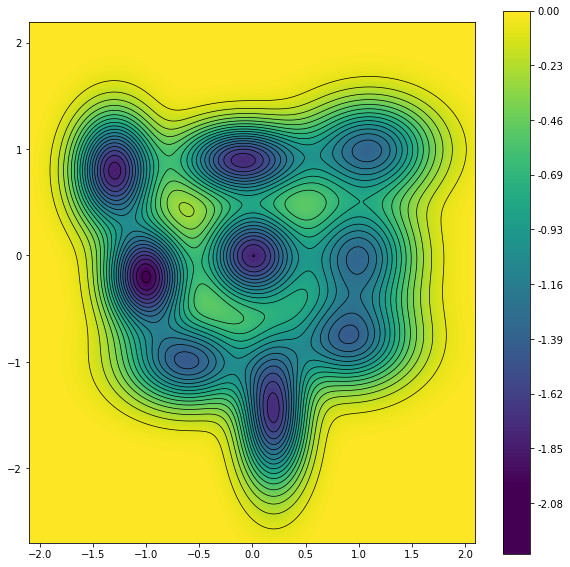

In [54]:
x = np.arange(-2.1,2.1,0.005)
y = np.arange(-2.7,2.2,0.005)
xx, yy = np.meshgrid(x,y)
z = potential([xx,yy])
plt.rcParams['figure.figsize'] = (10, 10)
levels1 = np.linspace(-2.3,0,150)
plt.contourf(xx, yy, z, levels = levels1)
plt.colorbar(format='%.2f')
plt.clim(-2,0)
contplot = plt.contour(xx, yy, z, 20,  colors='k')
for c in contplot.collections:
    c.set_linestyle('solid')
    c.set_linewidths(0.7)
plt.axes().set_aspect('equal')


<IPython.core.display.Javascript object>


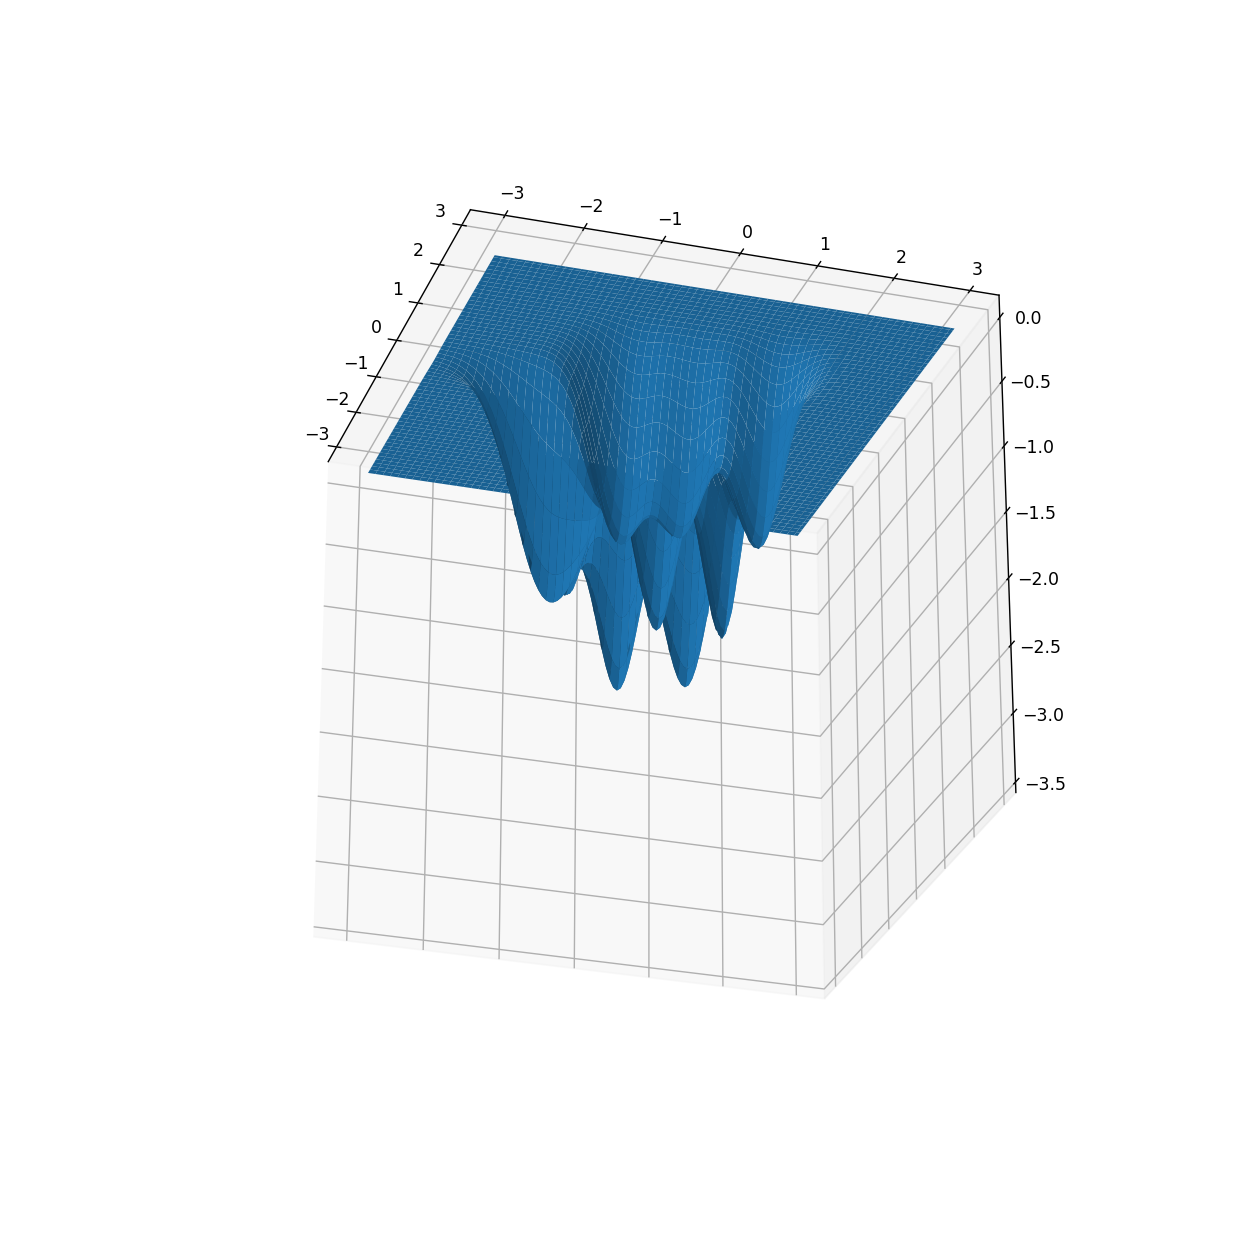

In [5]:
# Plot 3d version (better with matplotlib notebook activated)
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlim(-3.5, 0.1)
p = ax.plot_surface(xx, yy, z, rstride=2, cstride=2, linewidth=0)

In [ ]:
# Plot gradient of the potential to check consistency
zgrad = gradnorm(xx,yy)
plt.contour(xx, yy, zgrad, 25)
plt.axes().set_aspect('equal')
plt.colorbar()

In [ ]:
a=[3,4]

In [ ]:
np.linalg.norm(a)

In [ ]:
gradpot(1.5,0.8)

In [ ]:
# Create an interpolated version of the function and plot for consistency
fun = interp2d(xx, yy, z, kind='linear')
zz = fun(x,y)
plt.contour(xx, yy, zz, 25)
plt.axes().set_aspect('equal')

In [ ]:
x,y = [2,3]

In [ ]:
import numpy as np

In [ ]:
print(4*np.random.rand() - 2, 4*np.random.rand() - 2)

In [47]:
np.linspace(-3,0,100)

array([-3.        , -2.96969697, -2.93939394, -2.90909091, -2.87878788,
       -2.84848485, -2.81818182, -2.78787879, -2.75757576, -2.72727273,
       -2.6969697 , -2.66666667, -2.63636364, -2.60606061, -2.57575758,
       -2.54545455, -2.51515152, -2.48484848, -2.45454545, -2.42424242,
       -2.39393939, -2.36363636, -2.33333333, -2.3030303 , -2.27272727,
       -2.24242424, -2.21212121, -2.18181818, -2.15151515, -2.12121212,
       -2.09090909, -2.06060606, -2.03030303, -2.        , -1.96969697,
       -1.93939394, -1.90909091, -1.87878788, -1.84848485, -1.81818182,
       -1.78787879, -1.75757576, -1.72727273, -1.6969697 , -1.66666667,
       -1.63636364, -1.60606061, -1.57575758, -1.54545455, -1.51515152,
       -1.48484848, -1.45454545, -1.42424242, -1.39393939, -1.36363636,
       -1.33333333, -1.3030303 , -1.27272727, -1.24242424, -1.21212121,
       -1.18181818, -1.15151515, -1.12121212, -1.09090909, -1.06060606,
       -1.03030303, -1.        , -0.96969697, -0.93939394, -0.90